In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set high-quality visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

# Load the dataset
file_path = 'C:\\Users\\SC\\Desktop\\WINHMS Data Mining\\Data\\Company Wise Analysis Kum.xlsx'
# Define clean column names based on header at row 2
cols = ['Company', 'Nights', 'Occ_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ADR', 'ARP']
df_kum = pd.read_excel(file_path, skiprows=3, names=cols)

print("Libraries loaded and Kumarakom Company data imported.")

Libraries loaded and Kumarakom Company data imported.


In [3]:
# 1. Basic Cleaning: Remove rows with missing company names or totals
df_kum = df_kum.dropna(subset=['Company'])
df_kum = df_kum[~df_kum['Company'].str.contains('Total|Grand Total|Contribution Analysis', case=False, na=False)]

# 2. Convert numeric columns
numeric_cols = ['Nights', 'Occ_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ADR', 'ARP']
for col in numeric_cols:
    df_kum[col] = pd.to_numeric(df_kum[col], errors='coerce').fillna(0)

# 3. Filter for active companies (Revenue > 0)
df_active = df_kum[df_kum['Room_Revenue'] > 0].copy()

print(f"Ready for analysis with {len(df_active)} active companies.")
df_active.head()

Ready for analysis with 100 active companies.


,Company,Nights,Occ_Pct,Pax,Room_Revenue,Revenue_Pct,ADR,ARP
0,ABERCROMBIE & KENT INDIA PRIVATE LIMITED,2,0.17,4,12584.74,0.15,6292.370,3146.1850
1,ABSOLUTE LEISURE INTERNATIONAL,2,0.17,4,10449.14,0.12,5224.570,2612.2850
2,ACHUS TOURS,1,0.09,2,5360.17,0.06,5360.170,2680.0850
3,ADVENT TOURS,2,0.17,2,13516.94,0.16,6758.470,6758.4700
4,AGODA,64,5.46,125,572931.52,6.73,8952.055,4583.4522


C:\Users\SC\AppData\Local\Temp\ipykernel_20404\940815291.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_rev, x='Room_Revenue', y='Company', palette=colors)


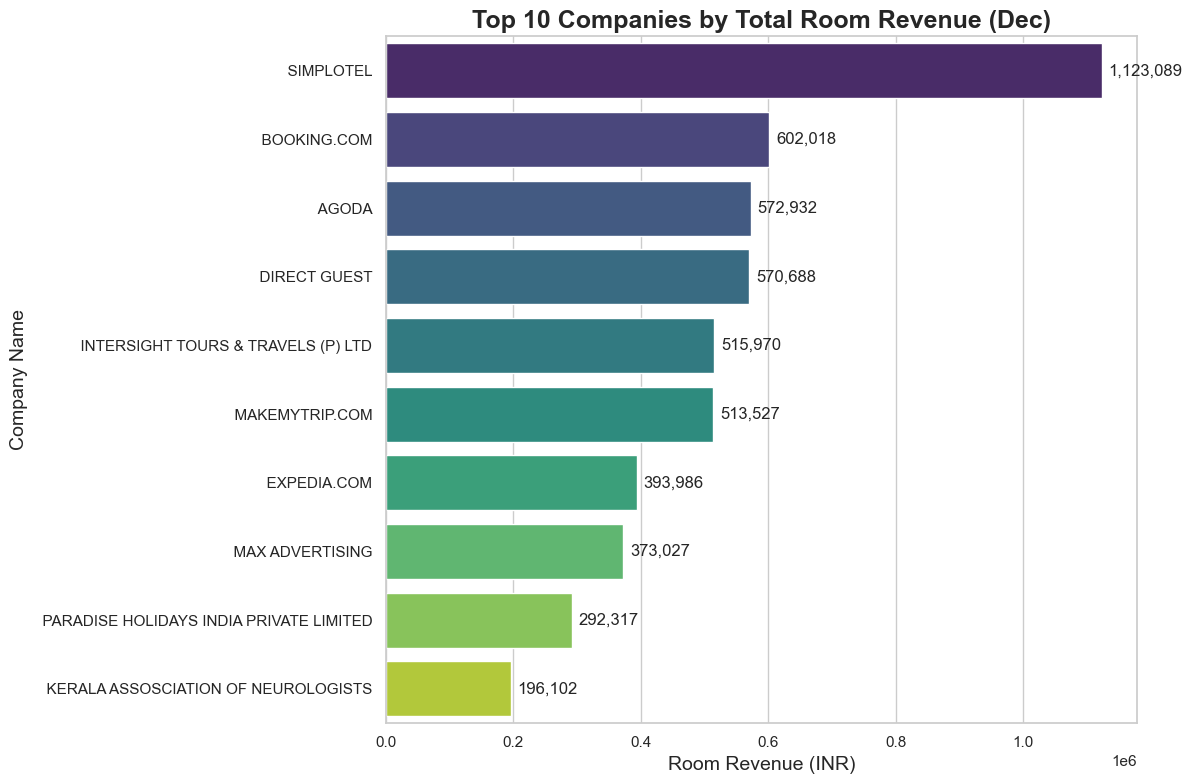

In [4]:
# Best for identifying top partners quickly
top_rev = df_active.sort_values(by='Room_Revenue', ascending=False).head(10)

plt.figure(figsize=(12, 8))
colors = sns.color_palette("viridis", 10)
ax = sns.barplot(data=top_rev, x='Room_Revenue', y='Company', palette=colors)

plt.title('Top 10 Companies by Total Room Revenue (Dec)', fontsize=18, fontweight='bold')
plt.xlabel('Room Revenue (INR)', fontsize=14)
plt.ylabel('Company Name', fontsize=14)

# Add value labels to bars
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=5)

plt.tight_layout()
plt.show()

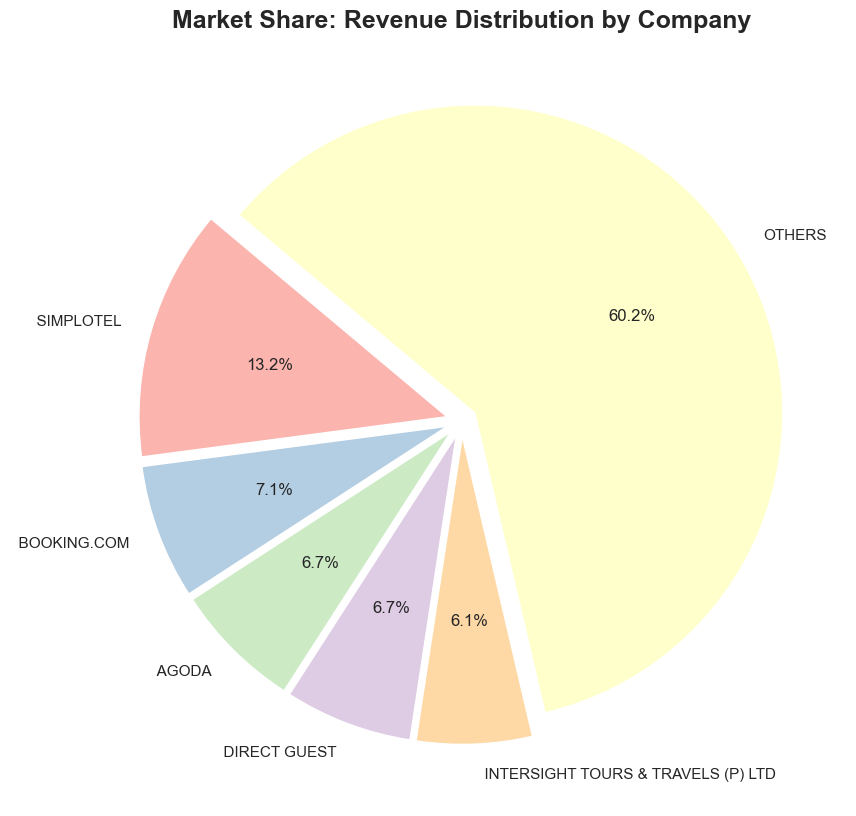

In [5]:
# Best for seeing the "Big Picture" of revenue concentration
# Group all but top 5 into "Others"
top_5 = df_active.sort_values(by='Room_Revenue', ascending=False).head(5)
others_val = df_active.sort_values(by='Room_Revenue', ascending=False).iloc[5:]['Room_Revenue'].sum()
pie_data = pd.concat([top_5, pd.DataFrame({'Company': ['OTHERS'], 'Room_Revenue': [others_val]})])

plt.figure(figsize=(10, 10))
plt.pie(pie_data['Room_Revenue'], labels=pie_data['Company'], autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette("Pastel1"), explode=[0.05]*len(pie_data))

plt.title('Market Share: Revenue Distribution by Company', fontsize=18, fontweight='bold')
plt.show()

#### --- INSIGHTS ---
#### 1. CHANNEL MIX: A large "Others" slice (e.g., >40%) is healthy as it shows a diversified client base.
#### 2. DOMINANCE: If the Top 5 companies take up more than 60% of the pie, the business is highly centralized.

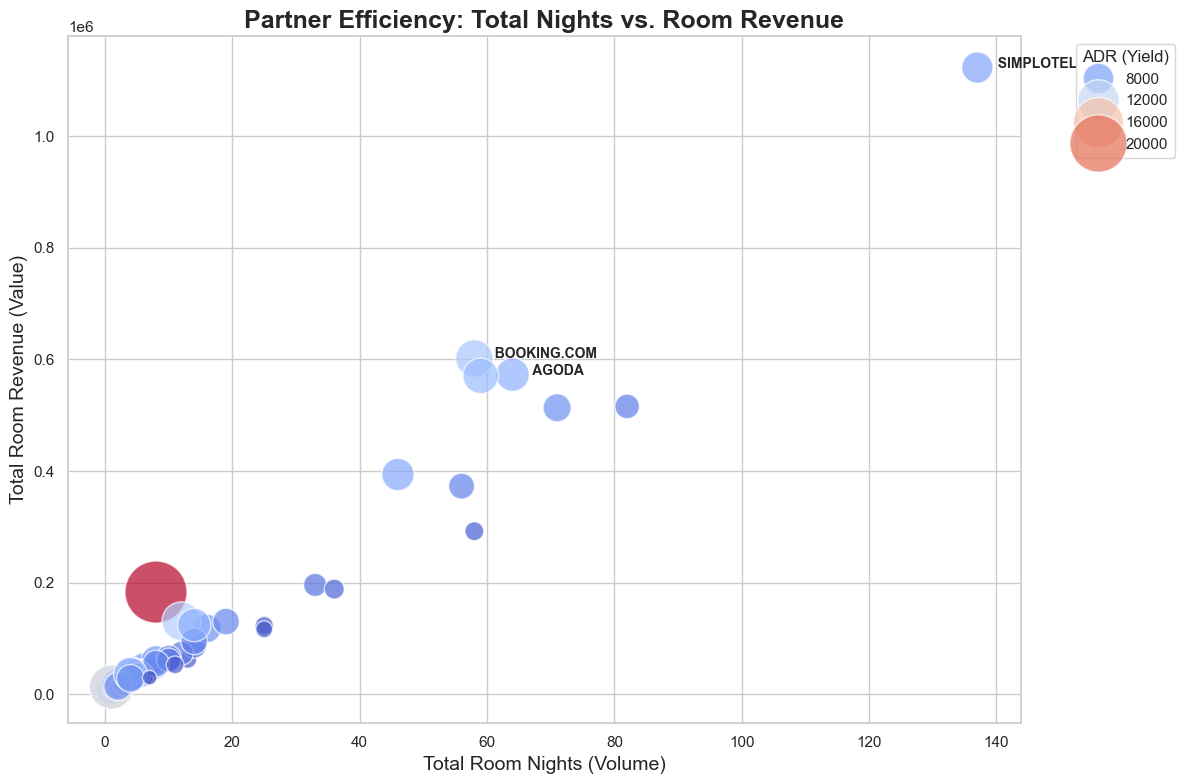

In [6]:
# Best for identifying "High Yield" vs "High Volume" partners
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df_active, x='Nights', y='Room_Revenue', size='ADR', 
                hue='ADR', sizes=(100, 2000), palette='coolwarm', alpha=0.7)

plt.title('Partner Efficiency: Total Nights vs. Room Revenue', fontsize=18, fontweight='bold')
plt.xlabel('Total Room Nights (Volume)', fontsize=14)
plt.ylabel('Total Room Revenue (Value)', fontsize=14)
plt.legend(title='ADR (Yield)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate top 3 outliers
top_3 = df_active.sort_values(by='Room_Revenue', ascending=False).head(3)
for i, row in top_3.iterrows():
    plt.text(row['Nights']+2, row['Room_Revenue'], row['Company'], fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. SUPERSTARS: Top-right quadrant (High nights, High revenue).
#### 2. HIDDEN GEMS: High on the Y-axis but low on X-axis (High revenue from few nights, high ADR).

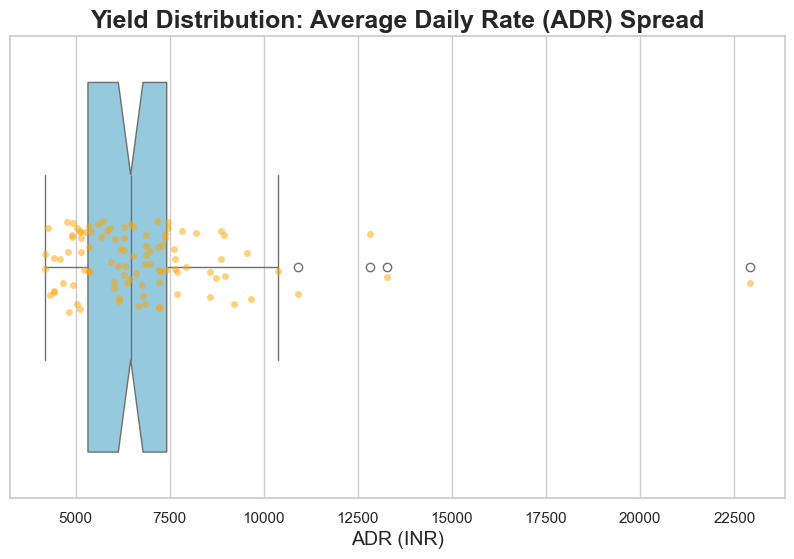

In [7]:
# Best for seeing the spread of prices across your partners
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_active['ADR'], color='skyblue', notch=True)
sns.stripplot(x=df_active['ADR'], color='orange', alpha=0.5)

plt.title('Yield Distribution: Average Daily Rate (ADR) Spread', fontsize=18, fontweight='bold')
plt.xlabel('ADR (INR)', fontsize=14)
plt.show()

#### --- INSIGHTS ---
#### 1. PRICING CONSISTENCY: A narrow box shows most partners are on similar rates.
#### 2. OUTLIERS: Orange dots far to the right represent "Premium Yield" partners booking high-end inventory.

In [8]:
# Create a comprehensive summary
summary = df_active[['Company', 'Nights', 'Room_Revenue', 'ADR', 'Revenue_Pct']].sort_values(by='Room_Revenue', ascending=False)
summary.to_csv('Kumarakom_Company_Performance_Summary.csv', index=False)

print("Full analysis complete. Top 5 Revenue Contributing Partners:")
summary.head(5)

Full analysis complete. Top 5 Revenue Contributing Partners:


,Company,Nights,Room_Revenue,ADR,Revenue_Pct
83,SIMPLOTEL,137,1123089.19,8197.7313,13.20
12,BOOKING.COM,58,602018.24,10379.6248,7.07
4,AGODA,64,572931.52,8952.0550,6.73
19,DIRECT GUEST,59,570687.86,9672.6756,6.71
43,INTERSIGHT TOURS & TRAVELS (P) LTD,82,515969.94,6292.3163,6.06


#### Executive Summary of Insights (Kumarakom):
#### 1. Partner Diversity: The data shows a wide range of travel partners, from large OTAs like Agoda to specialized luxury agents like Abercrombie & Kent.

#### 2. The Revenue Anchor: Identifying the top 1-3 partners from the bar chart will show who provides the resort's "base business."

#### 3. Yield Premium: The efficiency matrix identifies partners who may book fewer nights but provide a much higher ADR (Yield). These are high-priority partners because they drive profit without putting as much wear-and-tear on the property as high-volume/low-rate partners.

#### 4. Pricing Strategy: The box plot shows the "Average Rate" most companies are willing to pay. Companies below the "box" range should be reviewed for potential rate increases in the next season.